# 5. Analyzing Chocolate Data

In this chapter we are going to analyze the [Chocolate Bar Ratings](https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings) dataset. Our main focus will be to see the factors that affect the rating of the Chocolate Bars. So using tools learned in the previous chapters, we will get some insights in this dataset.

###### Set Up

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

data_dir = 'data/'

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')
    
%matplotlib inline
%config InlineBackend.figure_format='svg'

#constant variables needed for the configuration of plots' appereance
FONT_SCALE = 1.3
FONT_FAMILY = 'DejaVu Sans'

###### Load the data

Here we load the dataset.

In [30]:
chocolate_dataset = pd.read_csv(data_dir+'chocolate_bars.csv')
chocolate_dataset.columns

Index(['id', 'manufacturer', 'company_location', 'year_reviewed',
       'bean_origin', 'bar_name', 'cocoa_percent', 'num_ingredients',
       'ingredients', 'review', 'rating'],
      dtype='object')

In [31]:
chocolate_dataset.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


As we can see, the dataset has 11 columns. The `id` is the ID of the review for the chocolate bar. The `manufacturer` columns refers to the manufacturer of the chocolate bar. The `company_location` shows the location of the manufacturer. The `year_reviewed` stands for the year of the review of the chocolate bar. The `bean_origin` is the origin of the cocoa bean. The `bar_name` stands for the company that provides cocoa beans. The `cocoa_percent` shows the cocoa percentage of the bars. The `num_ingredients` and `ingredients` as the name indicate shows the ingredients of the chocolate bars. In addition, there are the `review` and the `rating` columns that capture interviewees' opinions on the chocolate bars.

Now let's analyze this dataset.

## 5.1 Analyzing the data

###### 5.1.1 Ratings per manufacturer

Let us start by checking how many ratings there are per manufacturer.

In [94]:
ratings_per_manufacturer = chocolate_dataset[['id', 'manufacturer']].groupby('manufacturer').count()

# we need this to preserve the columns
ratings_per_manufacturer = ratings_per_manufacturer.reset_index()

#here we sort the values in descending order and select the top 10
ratings_per_manufacturer = ratings_per_manufacturer.sort_values(by='id', ascending=False).iloc[:10,:]

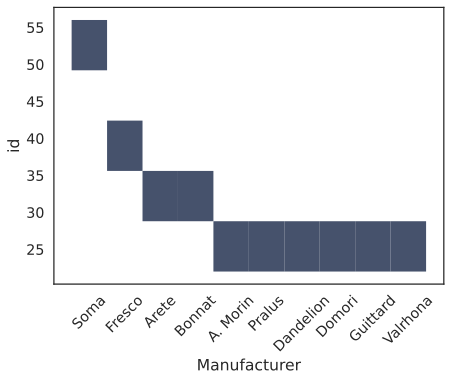

In [99]:
sns.set(rc={'figure.figsize': (7, 5), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    # seaborn's histogram
    ax = sns.histplot(
        data=ratings_per_manufacturer,
        x='manufacturer',
        y='id'
    )
    
    # matplotlib's customization
    ax.set_xlabel('Manufacturer')
    ax.set_xticklabels(labels, rotation=45)